# Introductory tutorial for PASTAQ DDA data exploration and processing
## Load pastaq and raw data
This tutorial shows the basic functionality of PASTAQ library provided by python binding. It use example files available at [OSF](https://osf.io/r7fdy/).

First load pastaq as well other packages for visualisation and some basic data analysis. Then load the LC-MS(/MS) file in mzML or mzXML format using the `read_mzml` or `read_mzxml` function. Set the average full width at half maximum (`avg_fwhm_rt`) of the chromatographic peak. Then load the default parameters for Orbitrap using `default_parameters` function and change required parameters (in this case MS2 resolution).

In [1]:
import pastaq as pq
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
from helpers import (
    plot_msSpectra,
    plot_meshPeaks,
    plot_meshRawPeaks,
    print_64bit_as_bytes,
    plot_meshPeaks_interactive,
    downloadTestFilesFromOSF,
    XICVisualisation,
    showXICRAWAligned,
    plot_feature_zoom
)

# Download example files from OSF if they don't exist
downloadTestFilesFromOSF()

# Now you can use 'examples/data/' as your sample_data_dir
sample_data_dir = os.path.join(os.getcwd(), "data") + "/"

exampleFile1 = sample_data_dir + '3_1_extract_3400_4100_590_615.mzML'
exampleFile2 = sample_data_dir + '3_2_extract_3400_4100_590_615.mzML'
exampleFile1c = sample_data_dir + '3_1_extract_3400_4100_590_615_c.mzML'
exampleFile2c = sample_data_dir + '3_2_extract_3400_4100_590_615_c.mzML'

# set average FWHM of chromatographic peaks to 25 seconds
avg_fwhm_rt = 25 # default 15

# load two example files for MS1 and MS2 layers
lcmsData1 = pq.read_mzml(exampleFile1, fwhm_rt = avg_fwhm_rt, ms_level = 1)
lcmsDataMS2_1 = pq.read_mzml(exampleFile1, fwhm_rt = avg_fwhm_rt, ms_level = 2)
lcmsData2 = pq.read_mzml(exampleFile2, fwhm_rt = avg_fwhm_rt, ms_level = 1)
lcmsDataMS2_2 = pq.read_mzml(exampleFile2, fwhm_rt = avg_fwhm_rt, ms_level = 2)
lcmsData1c = pq.read_mzml(exampleFile1c, fwhm_rt = avg_fwhm_rt, ms_level = 1)
lcmsDataMS2_1c = pq.read_mzml(exampleFile1c, fwhm_rt = avg_fwhm_rt, ms_level = 2)
lcmsData2c = pq.read_mzml(exampleFile2c, fwhm_rt = avg_fwhm_rt, ms_level = 1)
lcmsDataMS2_2c = pq.read_mzml(exampleFile2c, fwhm_rt = avg_fwhm_rt, ms_level = 2)

# Get the default parameters and change the resolution of MS2 to 17500.
params = pq.default_parameters(avg_fwhm_rt = avg_fwhm_rt)
params['resolution_msn'] = 17500

# Print the parameters used to load the two files.
print("Paramaters of the raw data:\n", params)

Checking mzML files in 'data/'...
All mzML files are present and have correct size. No download needed.
Paramaters of the raw data:
 {'instrument_type': 'orbitrap', 'resolution_ms1': 70000, 'resolution_msn': 17500, 'reference_mz': 200, 'avg_fwhm_rt': 25, 'num_samples_mz': 5, 'num_samples_rt': 5, 'smoothing_coefficient_mz': 0.4, 'smoothing_coefficient_rt': 0.4, 'warp2d_slack': 30, 'warp2d_window_size': 100, 'warp2d_num_points': 2000, 'warp2d_rt_expand_factor': 0.2, 'warp2d_peaks_per_window': 100, 'metamatch_fraction': 0.7, 'metamatch_n_sig_mz': 1.5, 'metamatch_n_sig_rt': 1.5, 'feature_detection_charge_states': [5, 4, 3, 2, 1], 'max_peaks': 1000000, 'polarity': 'both', 'min_mz': 0, 'max_mz': 100000, 'min_rt': 0, 'max_rt': 100000, 'link_n_sig_mz': 3, 'link_n_sig_rt': 3, 'ident_max_rank_only': True, 'ident_require_threshold': True, 'ident_ignore_decoy': True, 'similarity_num_peaks': 2000, 'qc_plot_palette': 'husl', 'qc_plot_extension': 'png', 'qc_plot_fill_alpha': 'dynamic', 'qc_plot_line_

## Print the main characteristics of LC-MS(/MS) data and the first 20 intensities of the MS1 spectra with id of 20.

Main characteristics of LCMS data:
 <bound method PyCapsule.dump of RawData:
> instrument_type: ORBITRAP
> resolution_ms1: 70000.000000
> resolution_msn: 17500.000000
> reference_mz: 200.000000
> centroid data: 0
> min_mz: 590.000099
> max_mz: 614.999939
> min_rt: 3400.143000
> max_rt: 4098.910680
> number of scans: 879> 

First 20 intensity of the scan  25 :
 [157969.28125, 479212.09375, 835210.875, 1121420.375, 915828.875, 544630.3125, 194391.90625, 38661.14453125, 11051.0771484375, 100983.140625, 117711.8671875, 101238.28125, 84982.71875, 158084.234375, 448262.40625, 783799.5625, 1029146.6875, 820259.8125, 496417.90625]
Retention time of the scan 25 :  3419.73942
0.00455 0.004945619826003167 0.009495619826003167 0.0035
0.00455 0.0069405219760483305 0.01149052197604833 0.0035
0.00455 0.006974686477519754 0.011524686477519754 0.0035
0.00455 0.006975111311589899 0.011525111311589899 0.0035


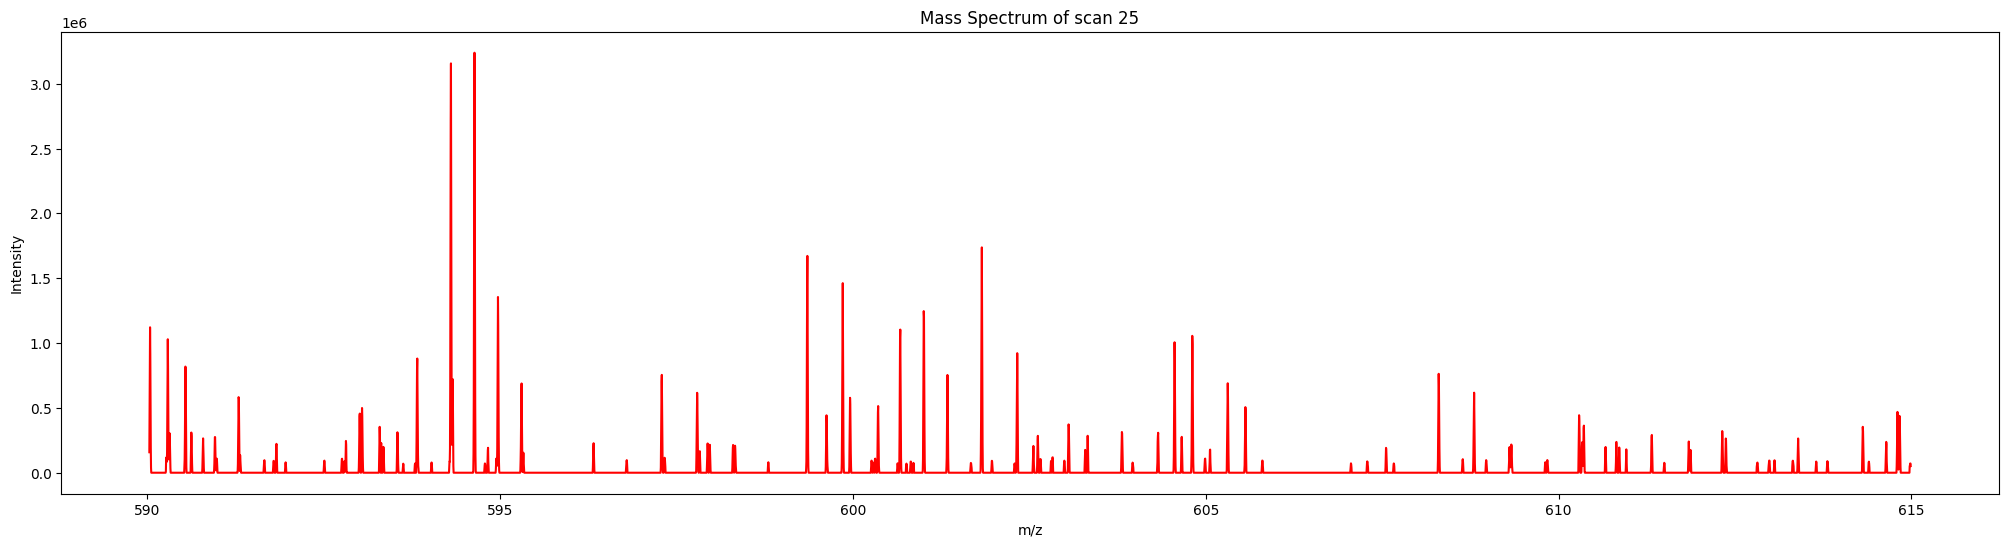

In [ ]:
# set a scan index to a value, print main characteristics of the first raw file and visualize the scan using plot_msSpectra function from the helpers.py
scanIdx = 25
print('Main characteristics of LCMS data:\n', lcmsData1.dump, '\n')
print('First 20 intensity of the scan ', scanIdx, ':\n', lcmsData1.scans[scanIdx].intensity[1:20])
print('Retention time of the scan', scanIdx, ': ', lcmsData1.scans[scanIdx].retention_time)
figMS = plot_msSpectra(lcmsData1.scans[scanIdx].mz, lcmsData1.scans[scanIdx].intensity, 0.0035, 1.3, scanIdx)

Zoom in of the spectra with defined range.

0.00455 0.004945619826003167 0.009495619826003167 0.0035
0.00455 0.0069405219760483305 0.01149052197604833 0.0035
0.00455 0.006974686477519754 0.011524686477519754 0.0035
0.00455 0.006975111311589899 0.011525111311589899 0.0035


(594.0, 597.0)

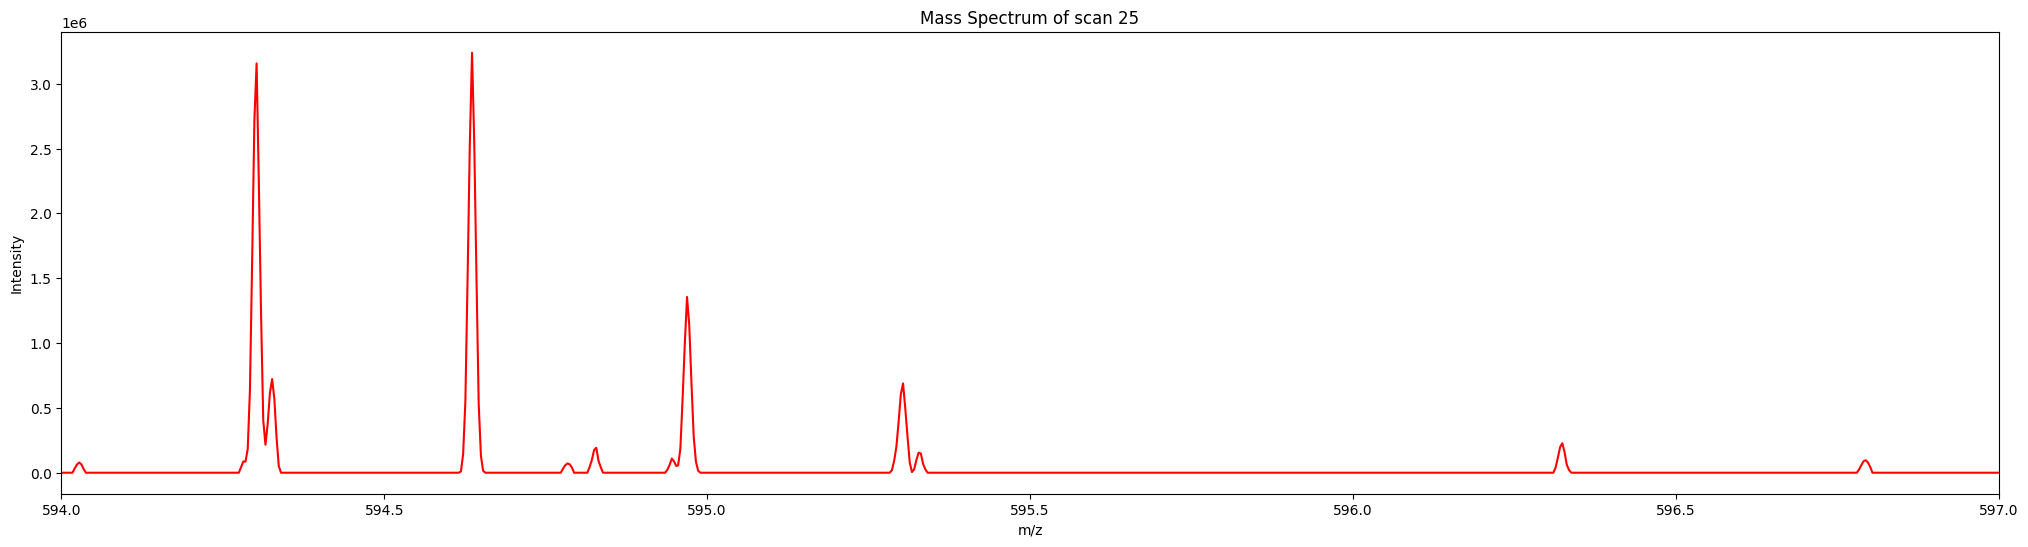

In [3]:
# zoom in on a specific mz range of the scan above
figMS = plot_msSpectra(lcmsData1.scans[scanIdx].mz, lcmsData1.scans[scanIdx].intensity, 0.0035, 1.3, scanIdx)
figMS.get_axes()[0].set_xlim(594,597)

## Perform smoothing and resampling of MS1 data using 2D Gaussian kernel density
- Perform the 2D smoothing with the `resample` function. This perform smoothing with two pass procedure which is a combination of Gaussian splatting and Gaussian smoothing. This smoothing does not preserve original raw data intensity, but serve to detect location of 2D Gaussian peaks. The 2D grid is samples uniformely for QQQ and Qiontrap or non-uniformely depending for TOF, Orbitrap and FTICR mass analyzer representing the same number of sampling point per peaks in m/z keeping the smoothing performance the same across teh whole m/z range.
- Plot the smooth and resampled data as a heatmap showing TIC and spectral sum with the `plot_mesh` function.

The similar peak pattern and the 120 second retention time shift are visible in the smooth figure.

First dataset
Second dataset


{'img_plot': <Axes: xlabel='m/z', ylabel='retention time (s)'>,
 'mz_plot': <Axes: ylabel='Intensity'>,
 'rt_plot': <Axes: xlabel='Intens'>}

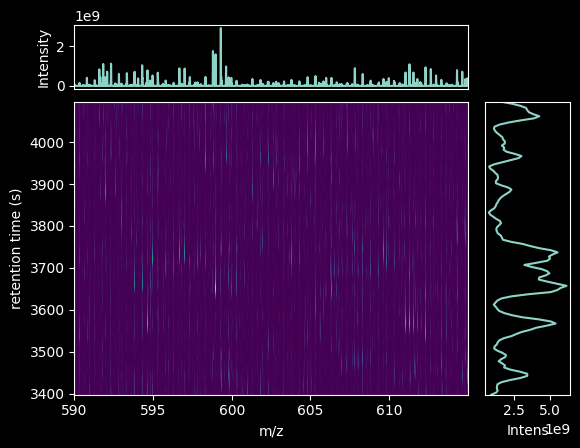

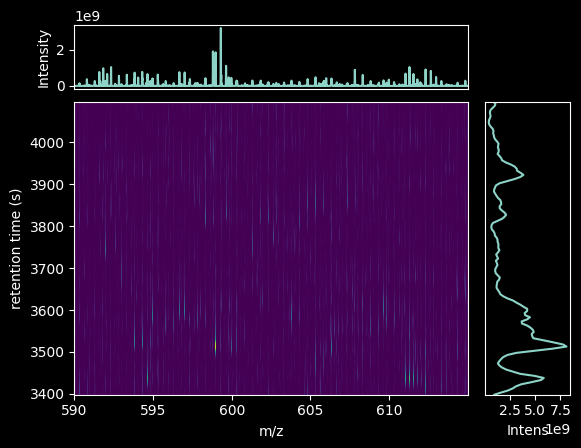

In [4]:
grid1 = pq.resample(lcmsData1, params['num_samples_mz'], params['num_samples_rt'], params['smoothing_coefficient_mz'], params['smoothing_coefficient_rt'])
grid2 = pq.resample(lcmsData2, params['num_samples_mz'], params['num_samples_rt'], params['smoothing_coefficient_mz'], params['smoothing_coefficient_rt'])

# plot the smoothed LC-MS map for dataset 1
print('First dataset')
pq.plot_mesh(grid1, transform='sqrt', figure=None)

# plot the smoothed LC-MS map for dataset 2
print('Second dataset')
pq.plot_mesh(grid2, transform='sqrt', figure=None)

## 2D Gaussian Peak Detection and Visualization of an Isotopologue Peak
2D Gaussian peak detection is performed using `find_peaks`, which detects peaks via a fast 2D Gaussian fit applied to local maxima in a smoothed 2D LC–MS grid with retention time (RT) and m/z dimensions.
The 2D grid is derived from the raw data using 2D Gaussian splatting followed by 2D kernel density smoothing.
The maximum number of detected peaks can be specified; the actual output list may be smaller if fewer peaks are found.

Below, we print the first (most abundant) peaks from the peak list of both files.<br>

The extracted ion chromatogram (EIC) corresponding to the maximum intensity peak is plotted with the `plot_xic` function.

Finally, we plot the raw data points, the total ion chromatogram (TIC), and the summed spectra for the peak with index 20 using the `plot_peak_raw_points` function.

Parameters of a peak with index set in idx:
 Peak <id: 20, local_max_mz: 593.825938, local_max_rt: 3664.676479, local_max_height: 81030400.308180, fitted_height: 17453149.619672, fitted_mz: 593.826155, fitted_rt: 3665.514680, fitted_sigma_mz: 0.005401, fitted_sigma_rt: 11.476932, fitted_volume: 6797503.990347>
Retention time and m/z of the centroid of idx-th peak:
 3405.1341977142856 595.6720476688529


{'img_plot': <Axes: >,
 'mz_plot': <Axes: ylabel='Intensity'>,
 'rt_plot': <Axes: xlabel='Intensity'>}

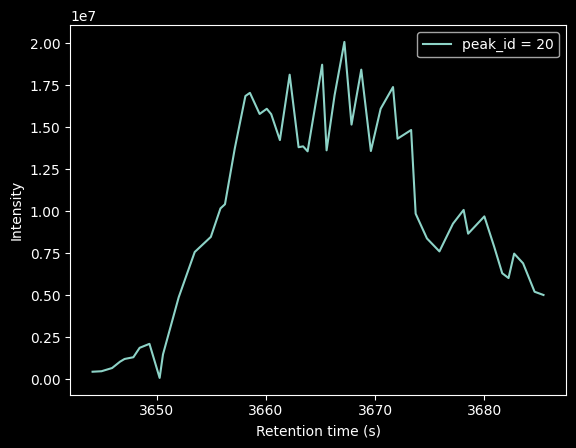

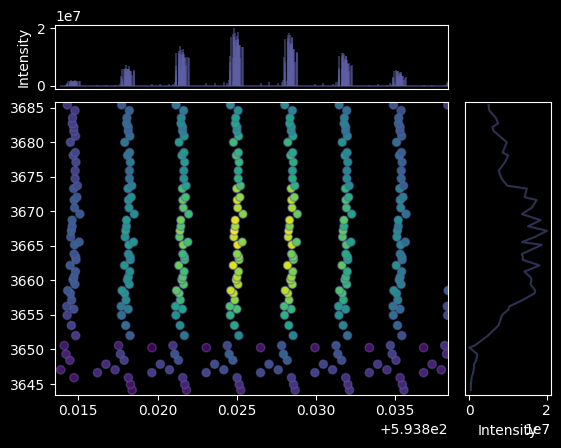

In [5]:
# detect peaks in both datasets
peaks1 = pq.find_peaks(lcmsData1, grid1, params['max_peaks'])
locMax1 = pq.find_local_maxima(grid1)
peaks2 = pq.find_peaks(lcmsData2, grid2, params['max_peaks'])
locMax2 = pq.find_local_maxima(grid2)

# print the parameters
peakIdx = 20
print("Parameters of a peak with index set in idx:\n", peaks1[peakIdx])
print("Retention time and m/z of the centroid of idx-th peak:\n", locMax1[peakIdx].rt, locMax1[peakIdx].mz)

# plot the EIC of the peak with index 20.
fill_alpha = params['qc_plot_fill_alpha']
line_alpha = params['qc_plot_line_alpha']
scatter_alpha = params['qc_plot_scatter_alpha']
palette = sns.color_palette(params['qc_plot_palette'], 10)
pq.plot_xic(peaks1[peakIdx], lcmsData1, figure=None, method="max")

# plot the peak raw points with TIC in total ion spectra
pq.plot_peak_raw_points(peaks1[peakIdx], lcmsData1, img_plot=None, rt_plot=None, mz_plot=None, xic_method="max")

## Visualization of the Raw Data and Smoothed Map XIC with Gaussian Peak Fit
First, the m/z width range limits are calculated using a specified number of sigmas, along with the retention time window. Using these limits, the `pq.xic` function extracts an ion chromatogram (XIC) within the defined retention time range using the raw LC-MS1 data. Next, the XIC trace of the smoothed LC-MS1 data using the previously determined m/z range is computed and visualized. Finally, the retention time of the detected peak is highlighted with a vertical green line, and the corresponding Gaussian fit is overlaid.

You can change the variable `peakIdx` to visualize different peaks. Since peaks are sorted by intensity, index 0 corresponds to the most abundant peak, while the last index corresponds to the least abundant one. You can also experiment with the `sigmaFactor` parameter, which defines the width of the XIC range in terms of the fitted m/z sigma of the Gaussian peak. A value of 0.25 focuses on a narrower local intensity region, while a value of 1 captures a broader range, producing a less noisy but more averaged raw data XIC.

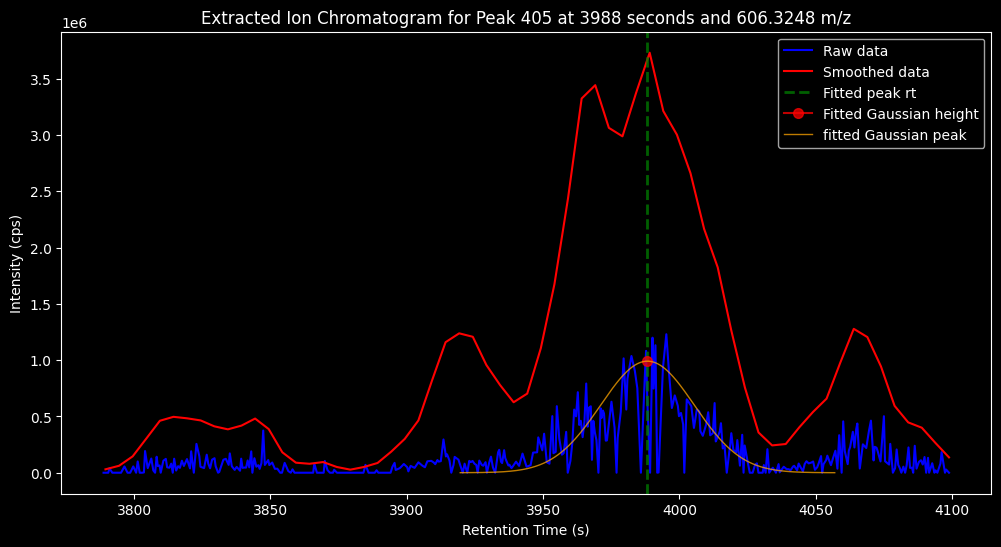

In [6]:
# give peak index in peakIdx, define the XIC range width in sigmaFactor and provide the width of the shown XIC in seconds in rtWidthXIC parameter
peakIdx = 405
sigmaFactor = 0.25 # 0.25 gives more or less local intensity, 1 give larger range and less noise raw data XIC
rtWidthXIC = 200 # rt width of XICs

XICVisualisation(lcmsData1, grid1, peaks1[peakIdx], sigmaFactor, rtWidthXIC)

## Detect Features and Link MS/MS to MS1 Peaks and Features
First, features (isotope clusters) are detected using the averagine model by calling the `detect_features` function. We then display the characteristics of the first isotope cluster for both example datasets.

Next, MS/MS events are linked to MS1 peaks based on proximity, expressed in units of sigma by calling the `link_peaks` function. The characteristics of the first most abundant isotope cluster are again shown for both datasets. Using these links—from MS/MS events to peaks, and from peaks (isotopologues) to features—it becomes possible to associate MS/MS spectra with features.

Finally, linking identification results to MS/MS events enables the assessment of identification consistency in DDA experiments.

In [7]:
# detecting features
features1 = pq.detect_features(peaks1, params['feature_detection_charge_states'])
features2 = pq.detect_features(peaks2, params['feature_detection_charge_states'])
print("First most abundant isotope cluster (feature) in dataset 1:", features1[0])
print("First most abundant isotope isotope cluster (feature) in dataset 2:", features2[0])

# linking MS/MS events to peaks.
linked_msms1 = pq.link_peaks(peaks1, lcmsDataMS2_1, params['link_n_sig_mz'], params['link_n_sig_rt'])
linked_msms2 = pq.link_peaks(peaks2, lcmsDataMS2_2, params['link_n_sig_mz'], params['link_n_sig_rt'])
print("First linked MS/MS event in dataset 1:", linked_msms1[0])
print("First linked MS/MS event in dataset 1:", linked_msms2[0])

First most abundant isotope cluster (feature) in dataset 1: Feature <id: 0, average_rt: 4063.935697, average_mz: 591.925752, total_height: 100721330.193530, monoisotopic_mz: 591.580295, monoisotopic_height: 26926912.009603, charge_state: 4, n_isotopes: 7>
First most abundant isotope isotope cluster (feature) in dataset 2: Feature <id: 0, average_rt: 3515.600989, average_mz: 599.296529, total_height: 184091569.174910, monoisotopic_mz: 598.969689, monoisotopic_height: 67078702.311875, charge_state: 3, n_isotopes: 4>
First linked MS/MS event in dataset 1: LinkedMsms <entity_id: 0, scan_index: 103, msms_id: 391, distance: 2.201093>
First linked MS/MS event in dataset 1: LinkedMsms <entity_id: 0, scan_index: 47, msms_id: 196, distance: 0.593648>


## Time-Align Two LC–MS Peak Lists
First, a piecewise alignment map between two peak lists is generated using the `calculate_time_map` function, which takes the following parameters:

1. Reference peak list
1. Sample peak list
1. slack – how far the end of each segment can shift during alignment (in virtual “points”)
1. segment_length – number of virtual “points” per segment used for alignment
1. num_points – total number of virtual “points” in the chromatogram; divided by segment_length gives the number of segments
1. expand_factor – allows the chromatogram to expand to accommodate the alignment at the beginning and end of the chromatogram
1. peaks_per_window – number of most abundant peaks in each segment to use for alignment

Next, the sample peak list’s retention times are aligned to the reference using the generated time map with the `warp_peaks` function.

The similarity between the sample and reference peak lists—both before and after alignment—is calculated using the `find_similarity` function. A low similarity score before alignment indicates substantial retention time drift (and/or very different molecular composition of the samples), whereas a large increase in the score after alignment demonstrates the success of the process.

You can experiment with these parameters to see how they influence the alignment quality and overall similarity between LC–MS maps.

In [8]:
# calculate alignment time map (piece-wise linear alignment function) between peak1 (not altered and used as reference) and peak2 (sample peak list, which will change retention time)
time_map_1r_2s = pq.calculate_time_map(peaks1, peaks2, 5, 10, 500, 0.2, 20)

# align peaks2 to peaks1 using the calculated time map
peaks2_1r = pq.warp_peaks(peaks2, time_map_1r_2s)

# calculate similarity matrix before and after warping between peak list 1 and 2
print("Raw data similarity: {:.5f}".format(pq.find_similarity(peaks1, peaks2,params['similarity_num_peaks']).geometric_ratio))
print("Similarity after alignment: {:.5f}".format(pq.find_similarity(peaks1, peaks2_1r,params['similarity_num_peaks']).geometric_ratio))

Raw data similarity: 0.08275
Similarity after alignment: 0.73966


## Effect of Alignment on Sample and Reference XICs and for the Corresponding Peak
This plot compares the Extracted Ion Chromatogram (XIC) of a peak in dataset 2 (corresponding to a reference peak in dataset 1) before and after retention time alignment.

* The reference XIC with the selected peak (selected using the peakIdx variable) from dataset 1 is shown in blue.
* The corresponding XIC with the matched peak in dataset 2 is shown in:
    * <span style="color: red;">Red</span> – raw (unaligned) data
    * <span style="color: green;">Green</span> – after alignment

The dots indicate the peak apex positions:
* <span style="color: blue;">Blue</span> – reference peak (dataset 1)
* <span style="color: red;">Red</span> – matched peak in raw dataset 2
* <span style="color: green;">Green</span> – matched peak in aligned dataset 2

The `interpolate_value` function (in `helpers.py`) interpolates the retention time values of the XIC in dataset 2, enabling visualisation of the aligned trace on the retention time axis of dataset 1.

Raw data similarity: {}Peak <id: 405, local_max_mz: 606.324937, local_max_rt: 3989.104330, local_max_height: 3732105.558788, fitted_height: 991248.121652, fitted_mz: 606.324804, fitted_rt: 3988.299843, fitted_sigma_mz: 0.006581, fitted_sigma_rt: 17.172506, fitted_volume: 703876.771240>
Raw data similarity: {}Peak <id: 408, local_max_mz: 606.325075, local_max_rt: 3854.859054, warped_rt: 3989.476145 (134.617091), local_max_height: 3338044.955683, fitted_height: 822867.869747, fitted_mz: 606.324536, fitted_rt: 3853.712044, fitted_sigma_mz: 0.006076, fitted_sigma_rt: 14.763960, fitted_volume: 463780.281107>


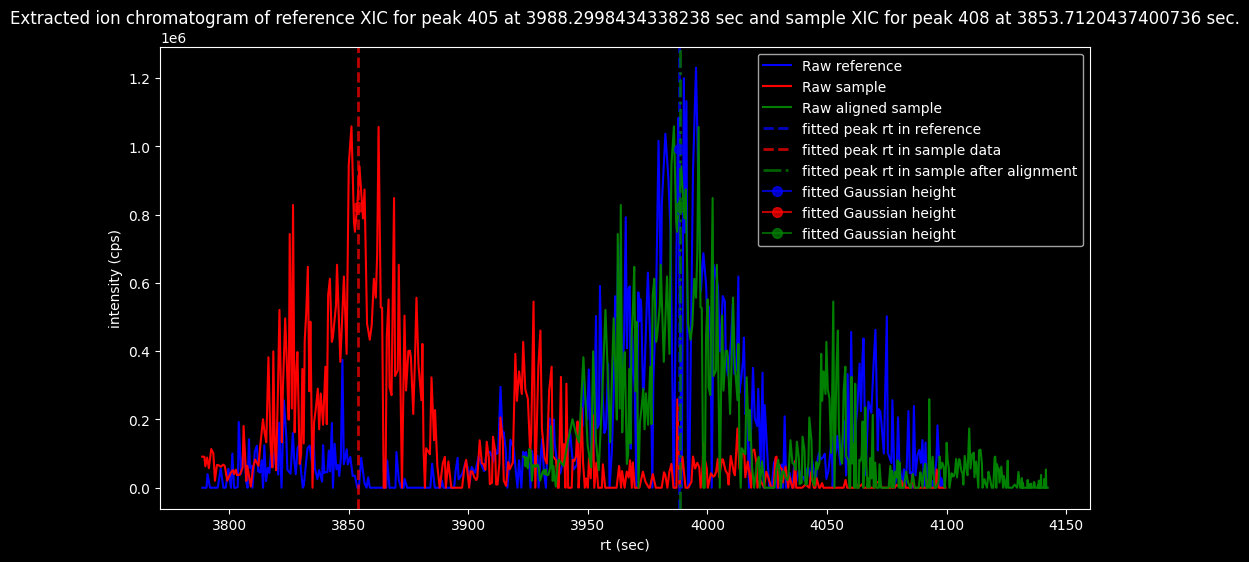

In [9]:
# plotting raw reference and raw and aligned sample sample XICs for and showing a selected peak in the reference XIC and corresponding peak in the sample XICs
showXICRAWAligned(lcmsData1, lcmsData2, peaks1[peakIdx], peaks2_1r, sigmaFactor, rtWidthXIC, time_map_1r_2s)

## Visualizing Isotopologue Peaks of a Feature (Isotope Cluster) in the Smoothed 2D Grid
Now, let’s zoom in on a region displaying an isotope cluster (feature) within the smoothed 2D grid. The isotopologue peaks that compose the feature are highlighted with red dots.
The zoomed area is defined by the retention time and m/z of the monoisotopic peak, extended by a specified range around that point.



Number of peaks in the feature:  6
Detected peaks in the feature:  [10, 16, 24, 68, 188, 632]


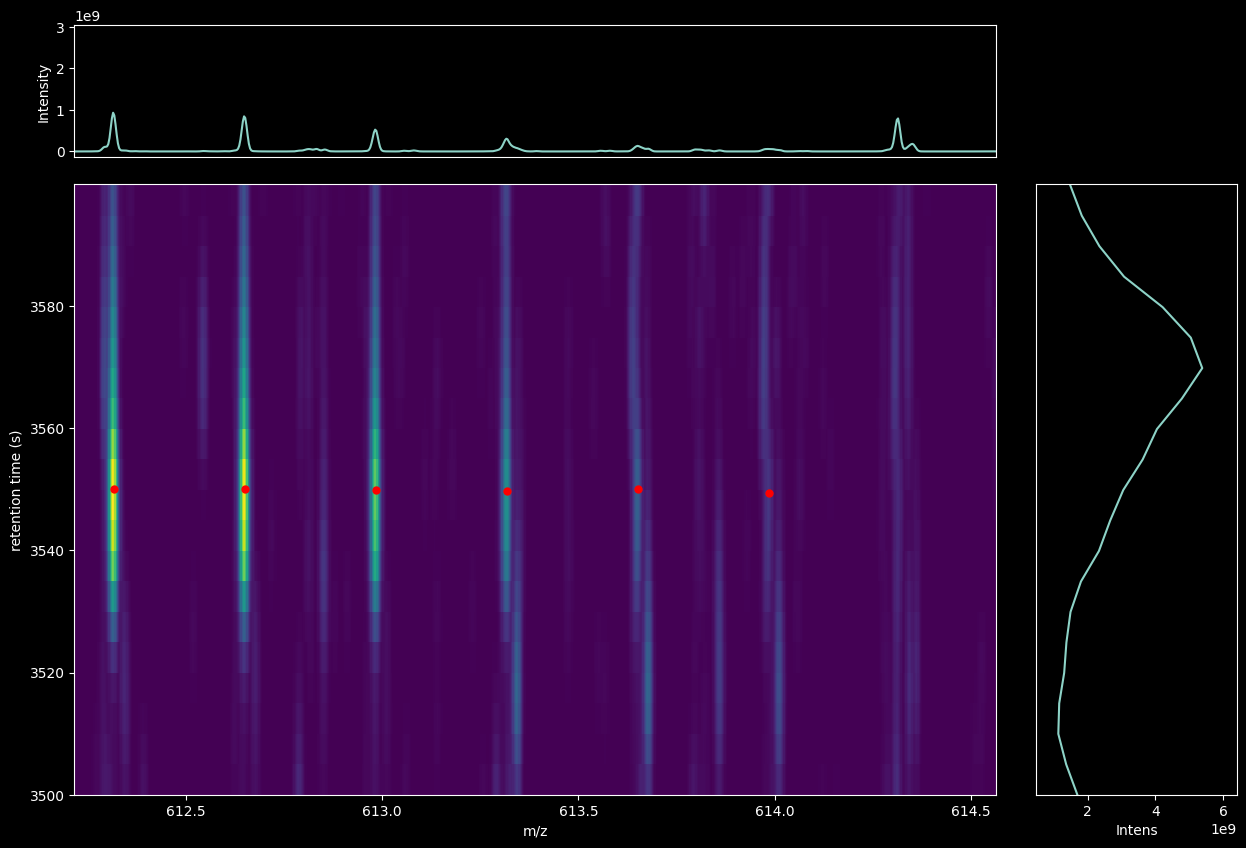

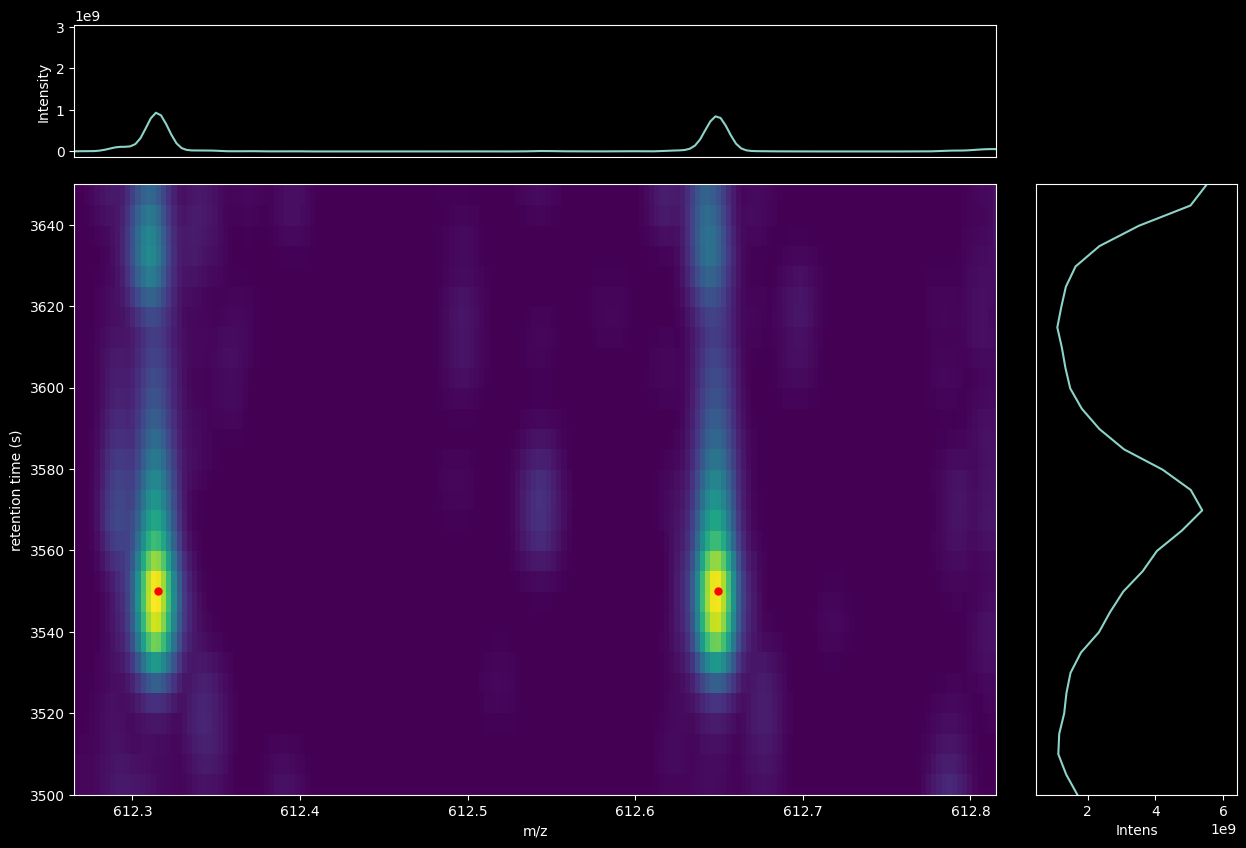

In [10]:
# show zoom in isotope cluster with detected peaks
peak1Idx = 24
rtp = 50 # retention in seconds added to isotope cluster monoisotopic peak m/z value (define the positive extension range of the plot in retention time)
rtm = 50 # retention in seconds substracted to isotope cluster monoisotopic peak m/z value (define the negative extension range of the plot in retention time)
mzm = 0.1 # m/z in Da added to isotope cluster monoisotopic peak m/z value (define the positive extension range of the plot in m/z)
mzp = 2.25 # m/z in Da substracted to isotope cluster monoisotopic peak m/z value (define the negative extension range of the plot in m/z)

featuresList = [obj for obj in features1 if peak1Idx in obj.peak_ids]
if len(featuresList) > 1:
    print('More than one feature detected for the peak')
print('Number of peaks in the feature: ', len(featuresList[0].peak_ids))
print('Detected peaks in the feature: ', featuresList[0].peak_ids)

plot_feature_zoom(grid1, featuresList[0], peaks1, mzm, mzp, rtm, rtp)

# zoom in to monoisotopic peak even more showing the area for 2 isotopologue peaks
rtp = 100 # retention in seconds added to isotope cluster monoisotopic peak m/z value (define the positive extension range of the plot in retention time)
rtm = 50 # retention in seconds substracted to isotope cluster monoisotopic peak m/z value (define the negative extension range of the plot in retention time)
mzm = 0.05 # m/z in Da added to isotope cluster monoisotopic peak m/z value (define the positive extension range of the plot in m/z)
mzp = 0.5 # m/z in Da substracted to isotope cluster monoisotopic peak m/z value (define the negative extension range of the plot in m/z)

plot_feature_zoom(grid1, featuresList[0], peaks1, mzm, mzp, rtm, rtp)

## Reading a Zoomed-In Region Directly from Raw Data

In this section, we will read only the zoomed-in portion of the raw data.  
We will then visualize this region using different smoothing parameters, detect all peak locations, and fit Gaussian peaks in the loaded region that pass 34 different quality criteria.  
By focusing on a small region, we can reduce the number of peaks and concentrate on evaluating peak-picking performance.

Peak locations identified in the smoothed 2D grid are shown as <span style="color: blue;">blue ×</span>, while the fitted Gaussian peaks are shown as <span style="color: red;">red dots</span> (<span style="color: red;">●</span>) and the corresponding peak location in the smopothed 2D grid is highlighted with <span style="color: green;">green circle</span> (<span style="color: green;">○</span>).

In the example below, two parameter sets are used for smoothing:  
- One with 5 sampling points in both dimensions  
- One with 10 sampling points in both dimensions  

Both parameter sets use a smoothing factor of 0.4 in m/z and 0.6 in retention time.  

In the comments, there is another parameter set listed with an increasing number of sampling points in both dimensions, which can be used to further assess the effect of these variables.

Main characteristics of LCMS data:
 <bound method PyCapsule.dump of RawData:
> instrument_type: ORBITRAP
> resolution_ms1: 70000.000000
> resolution_msn: 17500.000000
> reference_mz: 200.000000
> centroid data: 0
> min_mz: 612.940921
> max_mz: 613.480890
> min_rt: 3500.315640
> max_rt: 3649.336500
> number of scans: 183> 



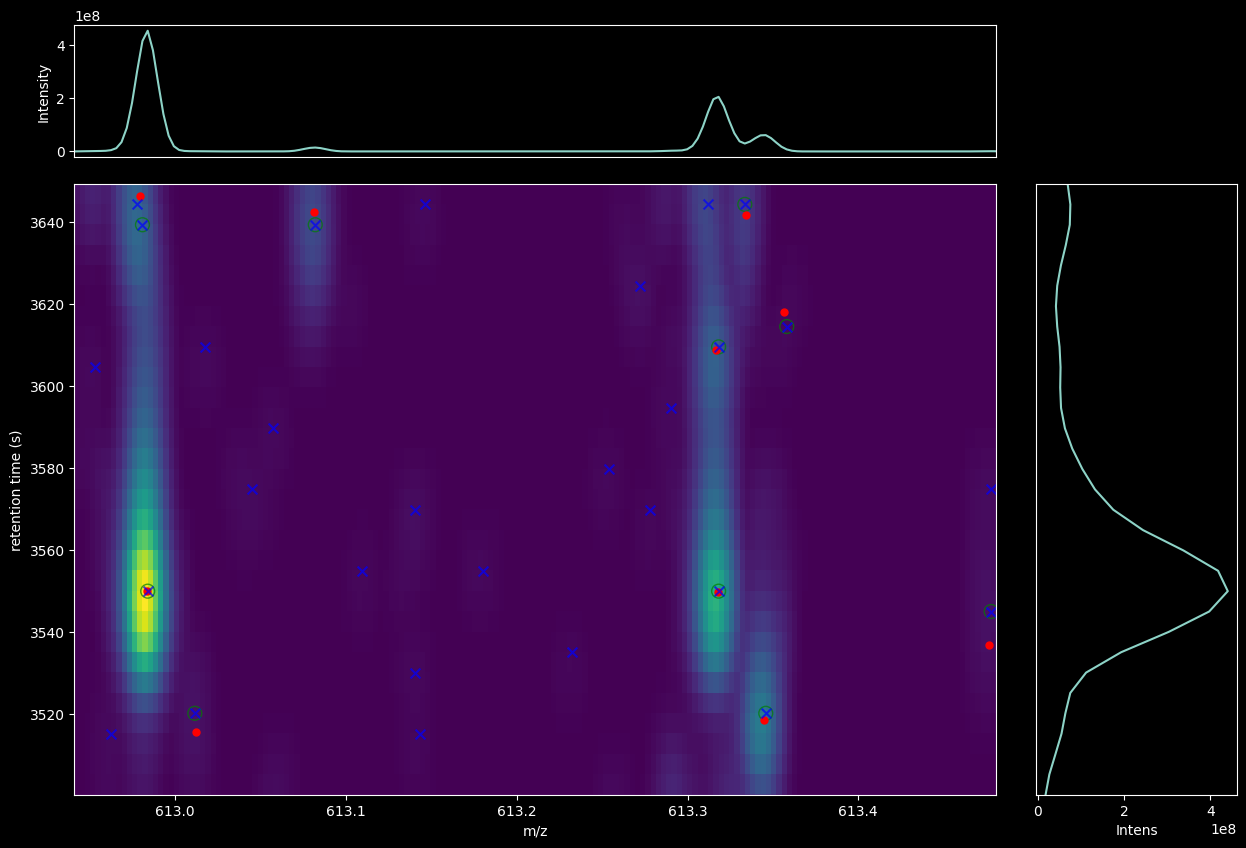

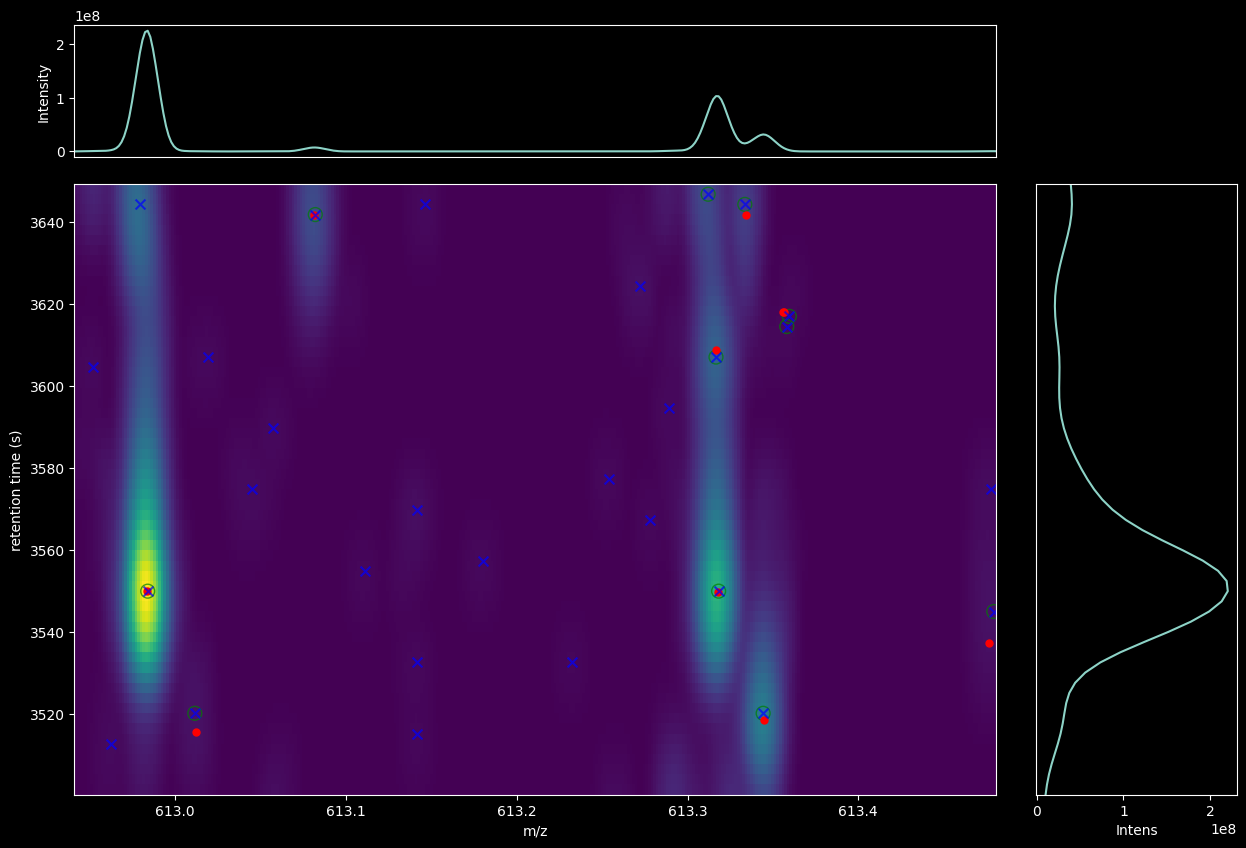

In [11]:
# Rereading the file with the mz and rt range zoomed to a peak area
lcmsData1r = pq.read_mzml(input_file = exampleFile1, min_mz = peaks1[peak1Idx].fitted_mz-mzm, max_mz = peaks1[peak1Idx].fitted_mz+mzp, min_rt = peaks1[peak1Idx].fitted_rt-rtm, max_rt = peaks1[peak1Idx].fitted_rt+rtp, instrument_type = 'ORBITRAP', resolution_ms1 = 70000, resolution_msn = 17500, reference_mz = 200, fwhm_rt = avg_fwhm_rt, polarity = '+', ms_level = 1)
# resampling with 10 sampling points per peak
grid1r, peaks1r, localMax1r, plot1r, xlim1r, ylim1r, mzVec1r, rtVec1r, mzVecMax1r, rtVecMax1r = [], [], [], [], [], [], [], [], [], []
smoothParam = [[5, 5, 0.4, 0.6], [10, 10, 0.4, 0.6]]
# smoothParam = [[5, 5, 0.4, 0.4], [10, 10, 0.4, 0.4], [15, 15, 0.4, 0.4], [20, 20, 0.4, 0.4], [25, 25, 0.4, 0.4]]
print('Main characteristics of LCMS data:\n', lcmsData1r.dump, '\n')

for i in range(len(smoothParam)):
    grid1r.append(pq.resample(lcmsData1r, smoothParam[i][0], smoothParam[i][1], smoothParam[i][2], smoothParam[i][3])) #num_samples_mz, num_samples_rt, smoothing_coefficient_mz, smoothing_coefficient_rt
    peaks1r.append(pq.find_peaks(lcmsData1r, grid1r[i], params['max_peaks']))
    localMax1r.append(pq.find_local_maxima(grid1r[i]))
    plot_meshPeaks(grid1r[i], peaks1r[i], localMax1r[i])

## Adding Raw Data to the Smoothed 2D Grid and Peak Locations

Let’s add the raw data to the plot above as a scatter plot, with point colors representing intensity using a colormap.

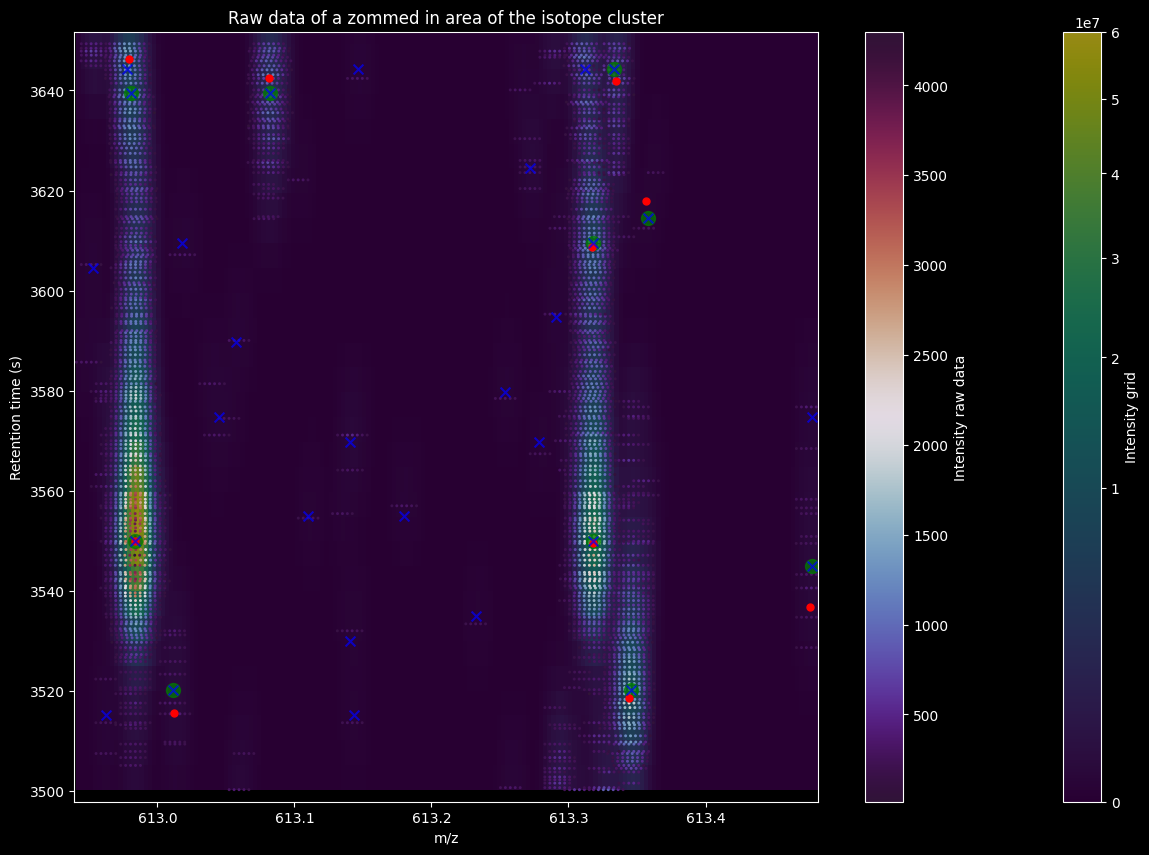

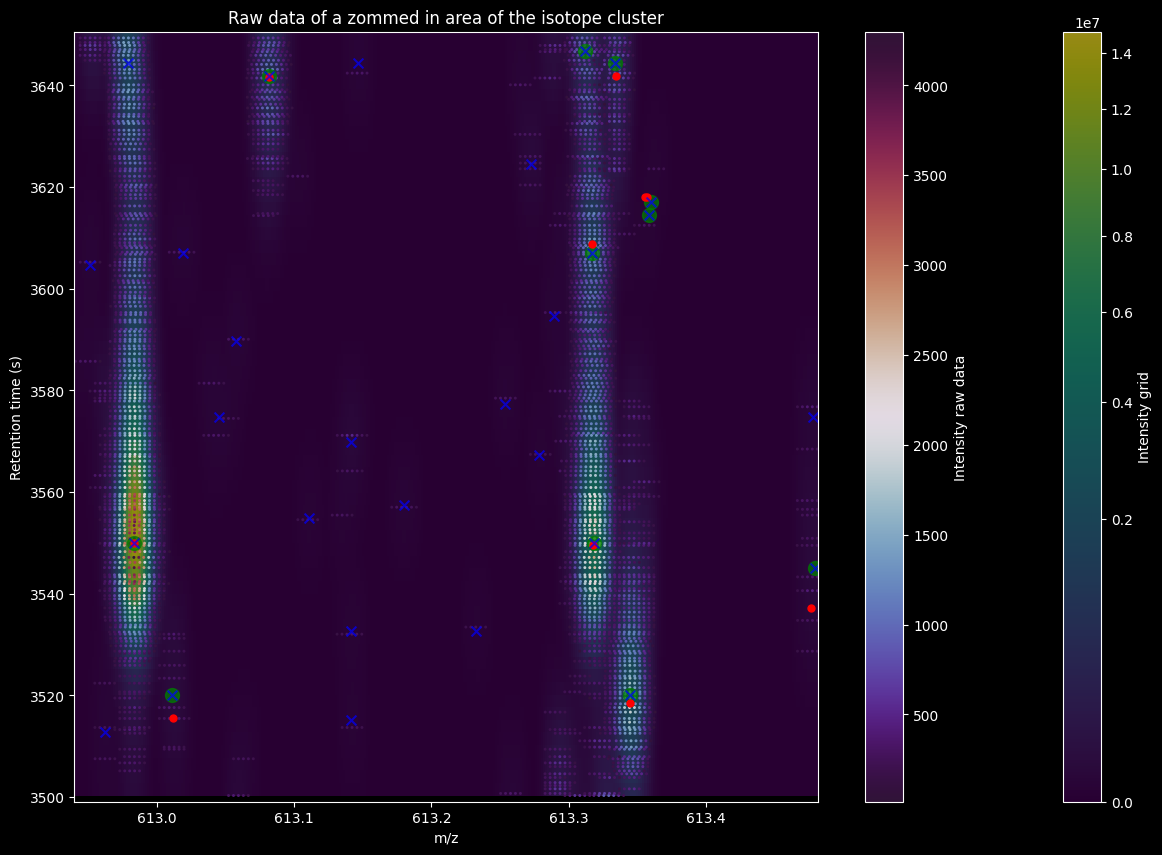

In [12]:
# Create a scatter plot showing the raw data
for i in range(len(smoothParam)):
    plot_meshRawPeaks(grid1r[i], lcmsData1r, peaks1r[i], localMax1r[i])

## Assessment of Gaussian Peak Fitting failures by Error Messages and Interactive and non-Interactive Maps.
For diagnostic purposes, it is important to understand why a Gaussian peak fit fails. There are 34 possible failure criteria.
By enabling the boolean `get_failed_peaks` parameter after reading the raw data, the peak picking algorithm will include in the peak list all local maxima even if that failed Gaussian fitting, along with an error code indicating the specific reason for failure.

First, we will list all possible reasons for Gaussian peak fitting failure.
Then, we will visualize both the correctly fitted peaks and the failed ones. The plots show the local maxima and the peak location after peak picking. There is a version of the plot, which shows the local maxima of the successfully fitted and failed Gaussian fits and a plot that only show the successfully fitted peaks. Index of the peaks in shown in order to facilitate linking of the local maxima with the position of the fitted peak.

Peak index: 3, Error code: 00000000 00000000 00000000 01000100 00000000 00000000 00000000 00000000, Error message(s):
Fit Failure Errors:
- Fitted rt is outside the expected range
- Fitted sigma_rt is too large

Peak index: 7, Error code: 00000000 00000000 00000000 00000010 00000000 00000010 00010000 00000000, Error message(s):
Fit Failure Errors:
- Parameter 'e' is non-negative
- NaN detected in fitted sigma_rt
- Fitted rt is outside the expected range

Peak index: 9, Error code: 00000000 00000000 00000000 00000000 01000000 00000000 00000000 00000000, Error message(s):
Fit Failure Errors:
- Fitted height exceeds twice the raw ROI max height

Peak index: 10, Error code: 00000000 00000000 00000000 00000000 01000000 00000000 00000000 00000000, Error message(s):
Fit Failure Errors:
- Fitted height exceeds twice the raw ROI max height

Peak index: 13, Error code: 00000000 00000000 00000000 01000100 00000000 00000000 00000000 00000000, Error message(s):
Fit Failure Errors:
- Fitted rt is ou

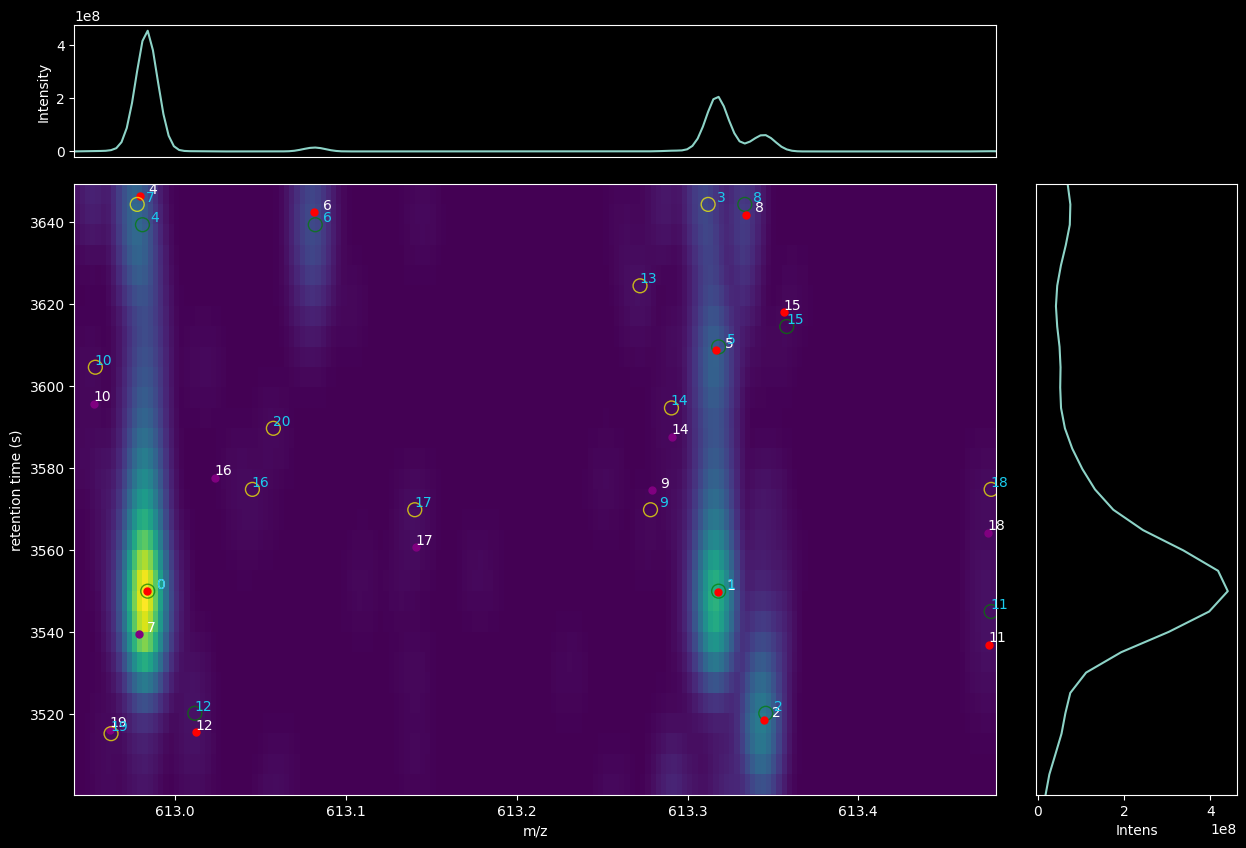

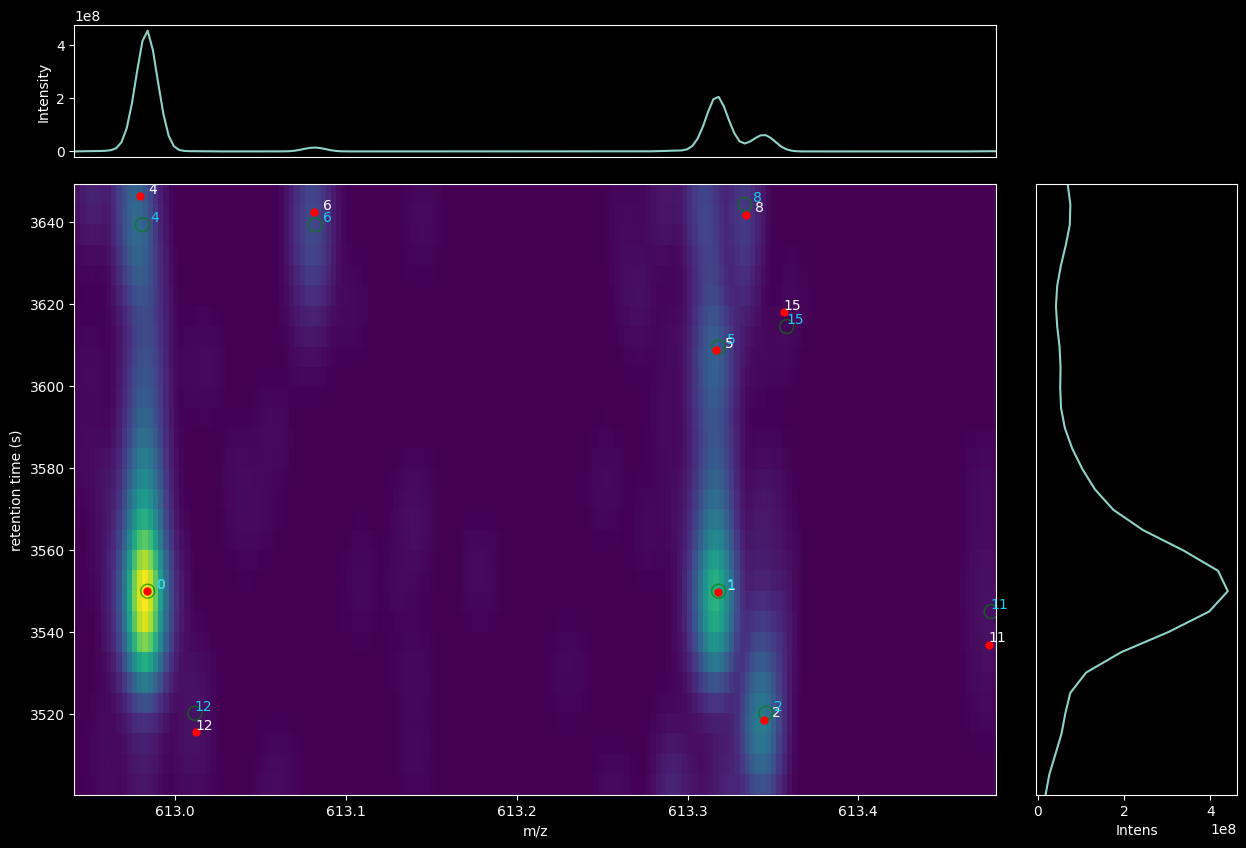

In [13]:
# show zoom in isotope cluster with detected peaks
lcmsData1r.get_failed_peaks = True # collect information on failed Gaussian peaks
# detecting peak with Gaussian peak fit failure diagnostic information
peaks1r, localMax1r = [], []
for i in range(len(smoothParam)):
    peaks1r.append(pq.find_peaks(lcmsData1r, grid1r[i], params['max_peaks']))
    localMax1r.append(pq.find_local_maxima(grid1r[i]))

# print failed peak diagnostic information
for i, peak in enumerate(peaks1r[0]):
    if peak.fit_failure_code != 0:
        print(f"Peak index: {i}, Error code: {print_64bit_as_bytes(peak.fit_failure_code)}, Error message(s):")
        print(pq.get_fit_failure_errors(peak.fit_failure_code, pq.Peak.error_messages))

# Plot with and without failed peaks
plotWithFailedPeaks = plot_meshPeaks(mesh=grid1r[0], peaks=peaks1r[0], localMax=[], withFailedPeaks=True, showIndeces=True)
plotWithoutFailedPeaks = plot_meshPeaks(mesh=grid1r[0], peaks=peaks1r[0], localMax=[], withFailedPeaks=False, showIndeces=True)

# Comment out to highlight the failed peak location after Gaussian fit with a yellow cross for better visualisation
# for i, peak in enumerate(peaks1r[0]):
#     if peak.fit_failure_code != 0:
#         plotWithFailedPeaks['img_plot'].scatter(peak.fitted_mz, peak.fitted_rt, s=25, c='yellow', marker='+')

Let now visualize the sample plot in interactive mode using plotly library.

In [14]:
# Interactive plotting using plotly the 2D smoothed grid and with all peaks
plotWithFailedPeaksInteractive = plot_meshPeaks_interactive(mesh=grid1r[0], peaks=peaks1r[0], localMax=localMax1r[0], withFailedPeaks=True, showIndeces=True)
plotWithFailedPeaksInteractive = plot_meshPeaks_interactive(mesh=grid1r[0], peaks=peaks1r[0], localMax=localMax1r[0], withFailedPeaks=False, showIndeces=True)

Let now visualize the raw data used for Gaussian peak fitting for the two local maxima on the top left corner with peak index 4 and 7. These two peaks are on the edge of the read LC-MS map and has incomplete raw data used for Gaussian peak fitting. The peak with index 4 has more complete raw data containing more complete information on the peak compared to local maxima with index 7.

m/z 612.98078 and retention time 3639 seconds of local maxima for peak index 4
m/z 612.97771 and retention time 3644 seconds of local maxima for peak index 7 



{'img_plot': <Axes: >,
 'mz_plot': <Axes: ylabel='Intensity'>,
 'rt_plot': <Axes: xlabel='Intensity'>}

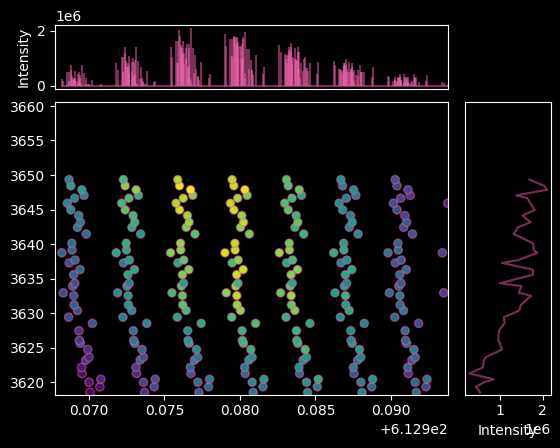

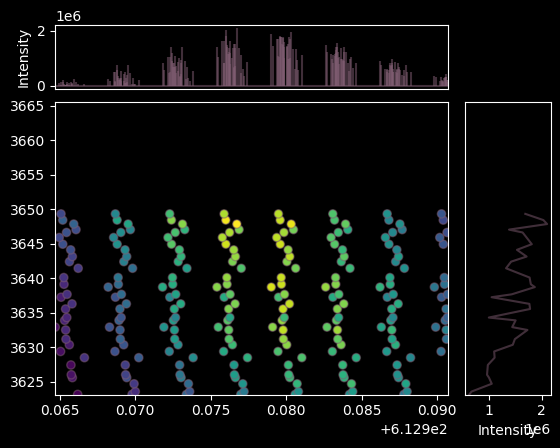

In [15]:
# plot the peak raw points with TIC in total ion spectra
print(f"m/z {peaks1r[0][4].local_max_mz:.5f} and retention time {peaks1r[0][4].local_max_rt:.0f} seconds of local maxima for peak index 4")
print(f"m/z {peaks1r[0][7].local_max_mz:.5f} and retention time {peaks1r[0][7].local_max_rt:.0f} seconds of local maxima for peak index 7 \n")

# plot the raw data used for Gaussian fitting for the two peaks above
pq.plot_peak_raw_points(peaks1r[0][4], lcmsData1r, img_plot=None, rt_plot=None, mz_plot=None, xic_method="max")
pq.plot_peak_raw_points(peaks1r[0][7], lcmsData1r, img_plot=None, rt_plot=None, mz_plot=None, xic_method="max")

## Processing centroid LC-MS(/MS) data.
The test files contain the centroid version of the profile LC-MS(/MS) data used in the previous examples. The conversion was performed using msconvert from ProteoWizard.
Centroid data is generated by keeping only the local peak maxima in mass spectra, which means that the peak width (and sigma) in m/z cannot be directly determined.

Pastaq adjusted the Gaussian peak fitting algorithm to centroid LC-MS(/MS) by using the theoretical value for $\sigma_{mz}$ and the m/z of the local maxima as $\mu_{mz}$ as known parameter (i.e. not determined by the Gaussian fit), while the other parameters such as $\sigma_{rt}$, $\mu_{rt}$ and peak *height* is obtained from Gaussian fit.
Since centroid data do not have data points across the m/z dimension, more intensive smoothing is required in the m/z dimension to detect local maxima.

Let’s now see how the 2D smoothed grid with adapted smoothing factors in m/z and the detected peaks looks by reading the corresponding centroid data file. Compare the list of detected peaks and local maxima with teh profile data.

Main characteristics of LCMS data:
 <bound method PyCapsule.dump of RawData:
> instrument_type: ORBITRAP
> resolution_ms1: 70000.000000
> resolution_msn: 17500.000000
> reference_mz: 200.000000
> centroid data: 1
> min_mz: 612.948118
> max_mz: 613.477287
> min_rt: 3500.315640
> max_rt: 3649.336500
> number of scans: 183> 



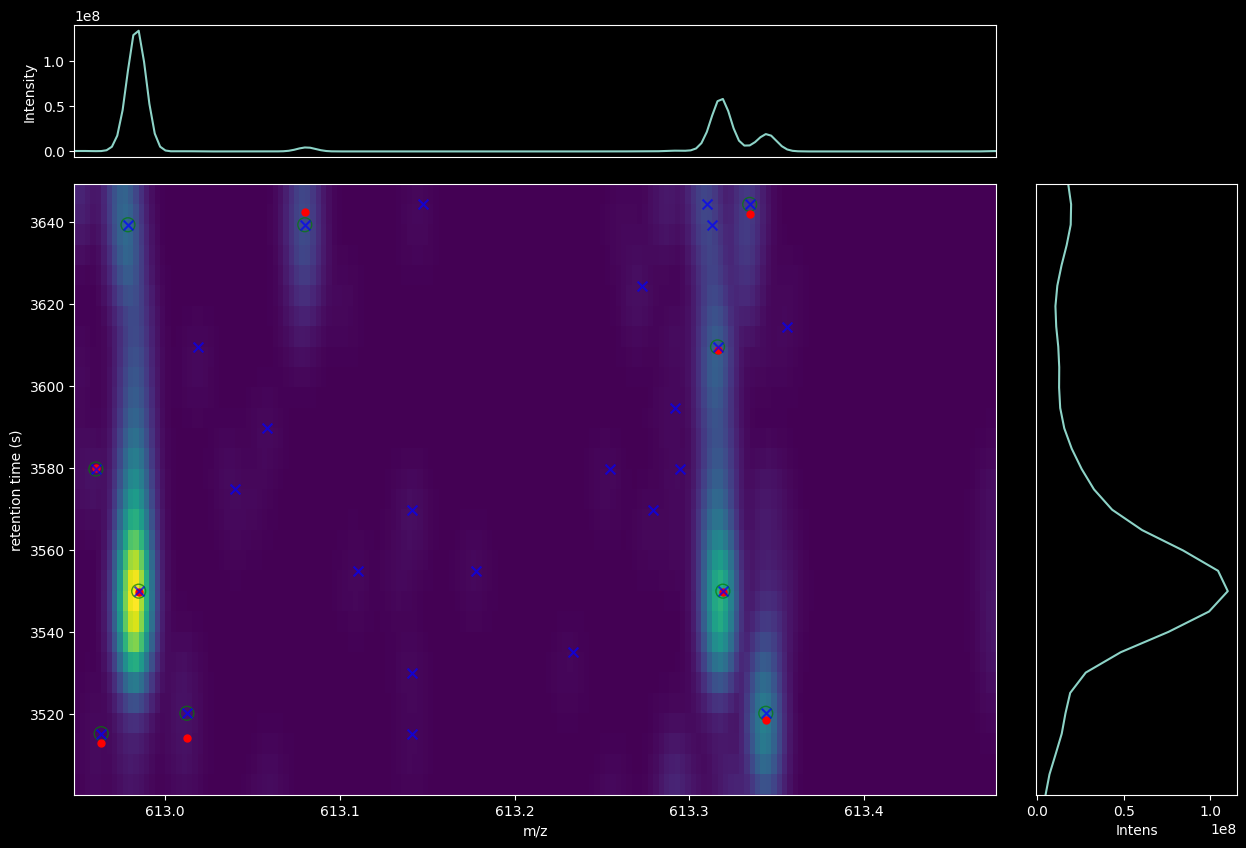

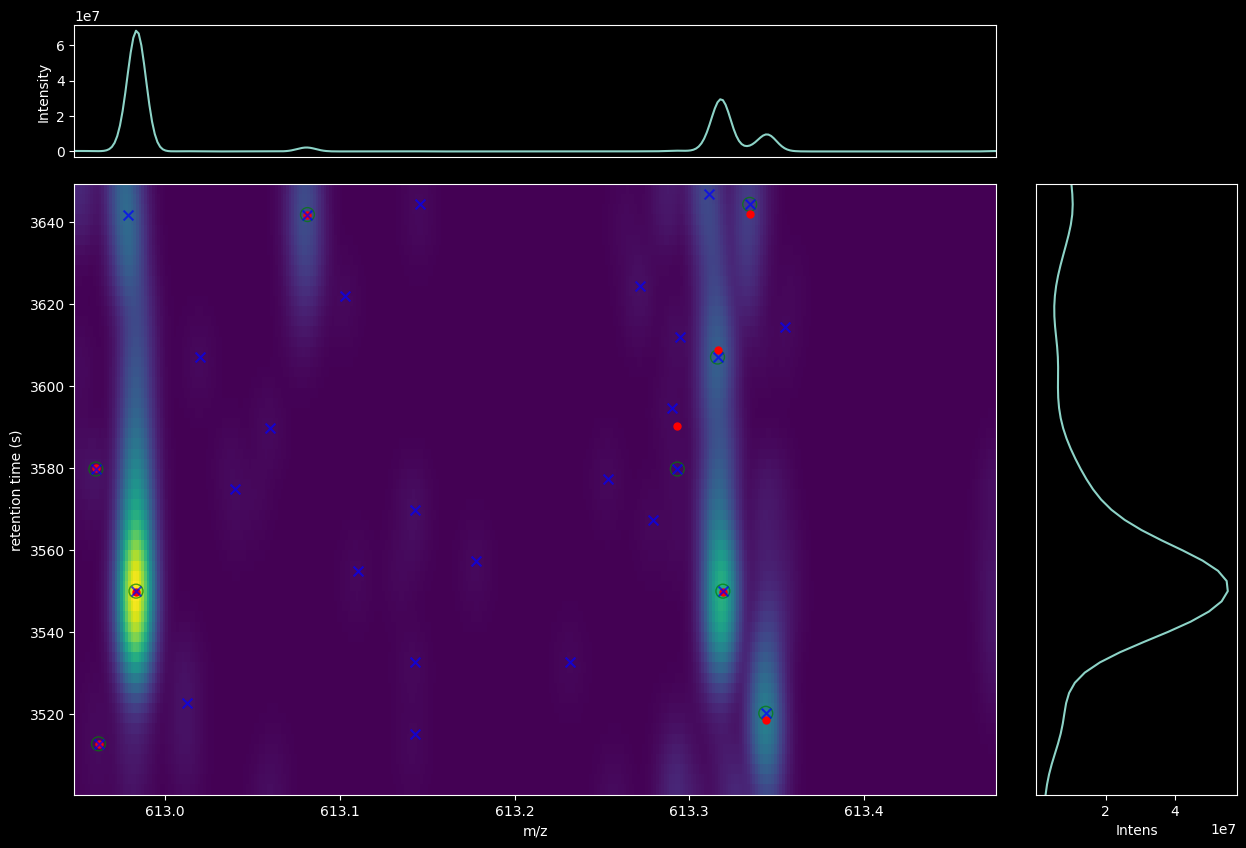

In [16]:
# smoothing parameters suing 5 and 10 sampling points in mz and rt and 0.8 smoothing parameter in m/z, which was 0.4 for profile data
smoothParam = [[5, 5, 0.8, 0.6], [10, 10, 0.8, 0.6]]

# Rereading the file with the mz and rt range zoomed to a peak area
lcmsData1rc = pq.read_mzml(input_file = exampleFile1c, min_mz = peaks1[peak1Idx].fitted_mz-mzm, max_mz = peaks1[peak1Idx].fitted_mz+mzp, min_rt = peaks1[peak1Idx].fitted_rt-rtm, max_rt = peaks1[peak1Idx].fitted_rt+rtp, instrument_type = 'ORBITRAP', resolution_ms1 = 70000, resolution_msn = 17500, reference_mz = 200, fwhm_rt = avg_fwhm_rt, polarity = '+', ms_level = 1)
print('Main characteristics of LCMS data:\n', lcmsData1rc.dump, '\n')

# get peaks Gaussian fit diagnostic data and failed peaks
lcmsData1rc.get_failed_peaks = True

# resampling with 10 sampling points per peak
grid1rc, peaks1rc, localMax1rc = [], [], []

# create smoothed 2D grid, perform centroid data specific peak picking and visualize the results
for i in range(len(smoothParam)):
    grid1rc.append(pq.resample(lcmsData1rc, smoothParam[i][0], smoothParam[i][1], smoothParam[i][2], smoothParam[i][3])) #num_samples_mz, num_samples_rt, smoothing_coefficient_mz, smoothing_coefficient_rt
    peaks1rc.append(pq.find_peaks(lcmsData1rc, grid1rc[i], params['max_peaks']))
    localMax1rc.append(pq.find_local_maxima(grid1rc[i]))
    plot_meshPeaks(grid1rc[i], peaks1rc[i], localMax1rc[i], withFailedPeaks=False, showIndeces=False)

Plot now the centroid data with the detected peaks and local maxima.

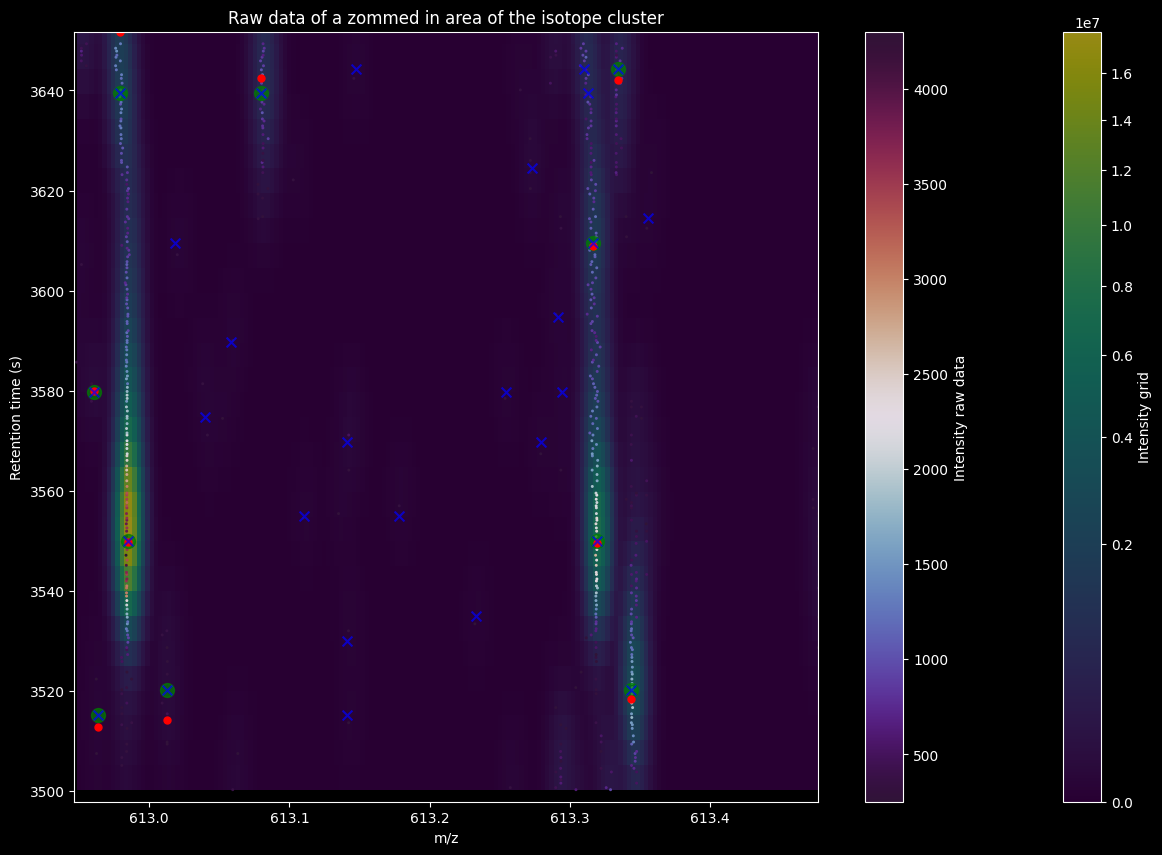

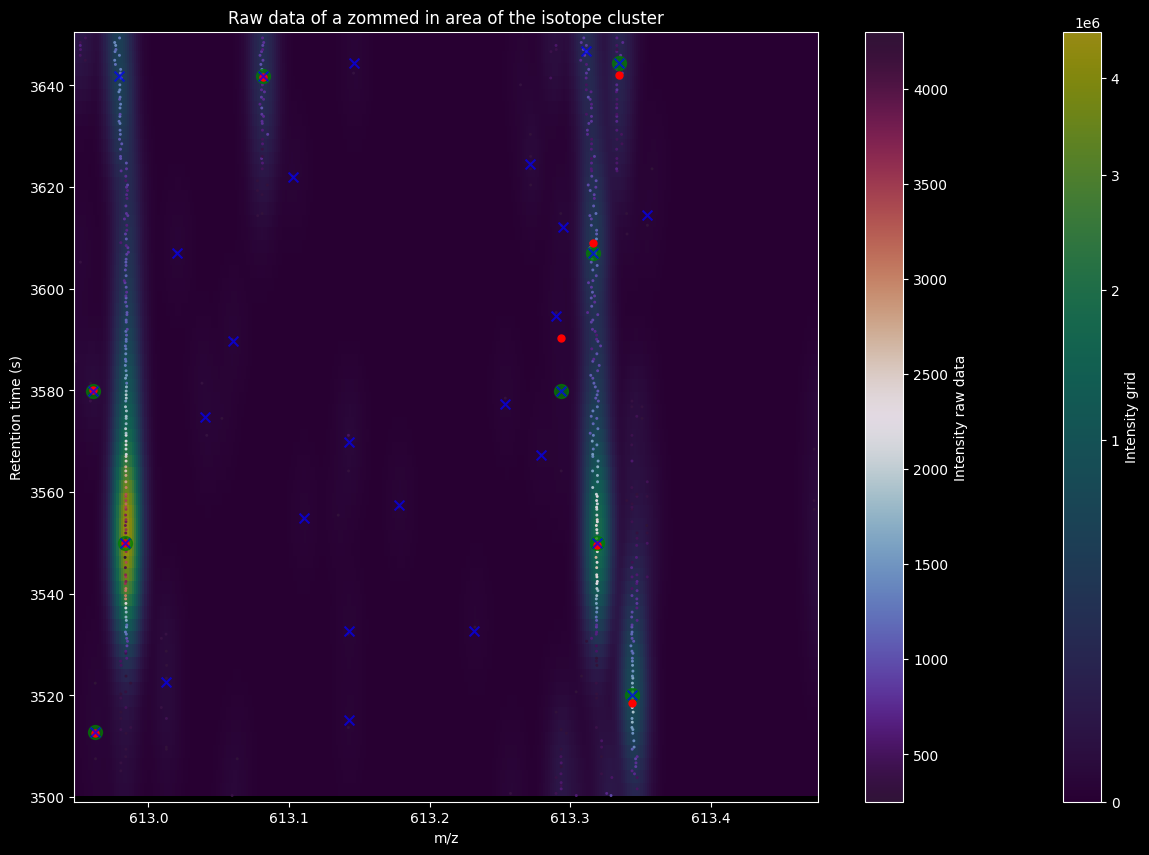

In [17]:
# Create a scatter plot showing the raw data    
for i in range(len(smoothParam)):
    plot_meshRawPeaks(grid1rc[i], lcmsData1rc, peaks1rc[i], localMax1rc[i])

Visualize 2D smooth grid with peaks with failed Gaussian peak fit.

Peak index: 6
Error code: 00000000 00000000 00000000 00000000 00000000 00000010 00001000 00000000
Fit Failure Errors:
- Parameter 'c' is non-negative
- NaN detected in fitted sigma_rt

Peak index: 7
Error code: 00000000 00000000 00000000 00000000 00000000 00000010 00001000 00000000
Fit Failure Errors:
- Parameter 'c' is non-negative
- NaN detected in fitted sigma_rt

Peak index: 9
Error code: 00000000 00000000 00000000 00010000 01000000 00000000 00000000 00000000
Fit Failure Errors:
- Fitted height exceeds twice the raw ROI max height
- Fitted sigma_rt is too small

Peak index: 10
Error code: 00000000 00000000 00000000 01000000 00000000 00000000 00000000 00000000
Fit Failure Errors:
- Fitted sigma_rt is too large

Peak index: 13
Error code: 00000000 00000000 00000000 00000000 00000000 00000010 00001000 00000000
Fit Failure Errors:
- Parameter 'c' is non-negative
- NaN detected in fitted sigma_rt

Peak index: 14
Error code: 00000000 00000000 00000000 00000000 00000000 00000010 00001000 

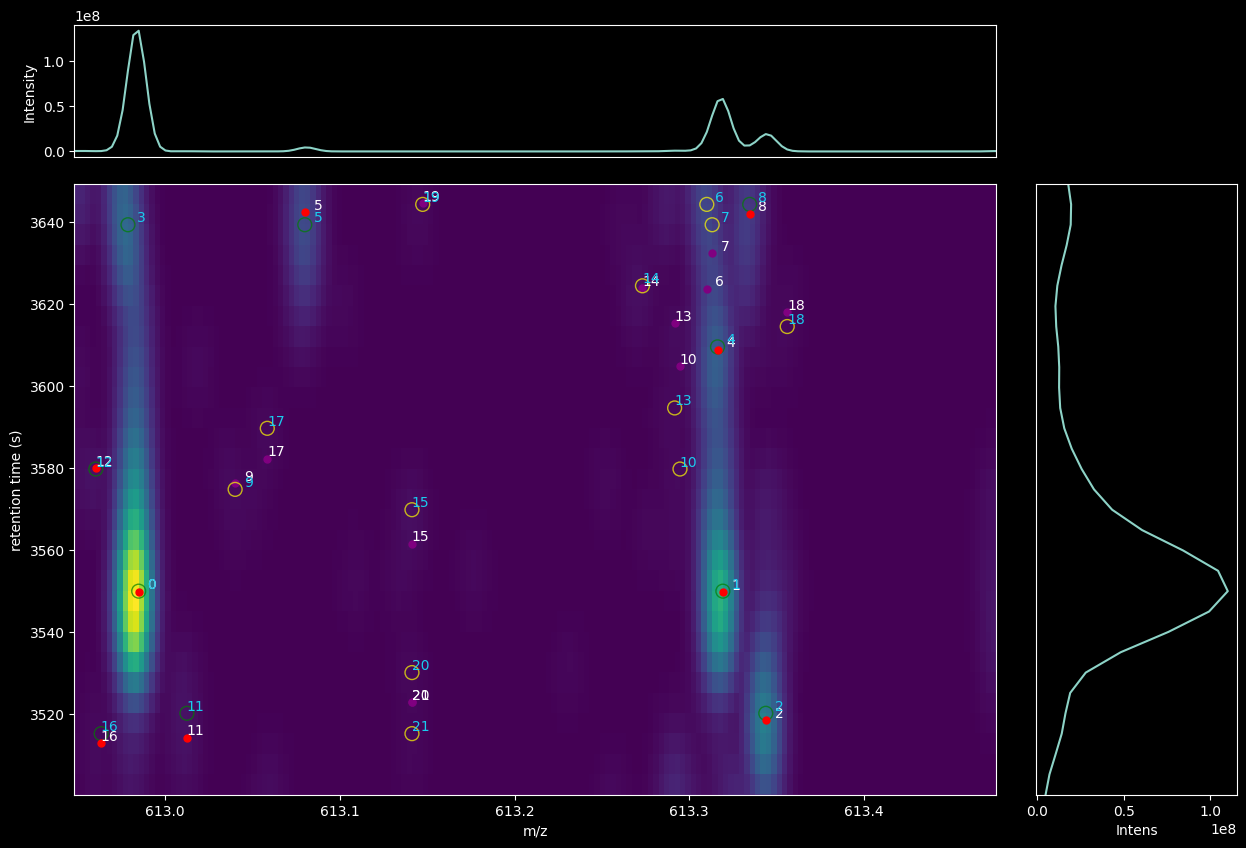

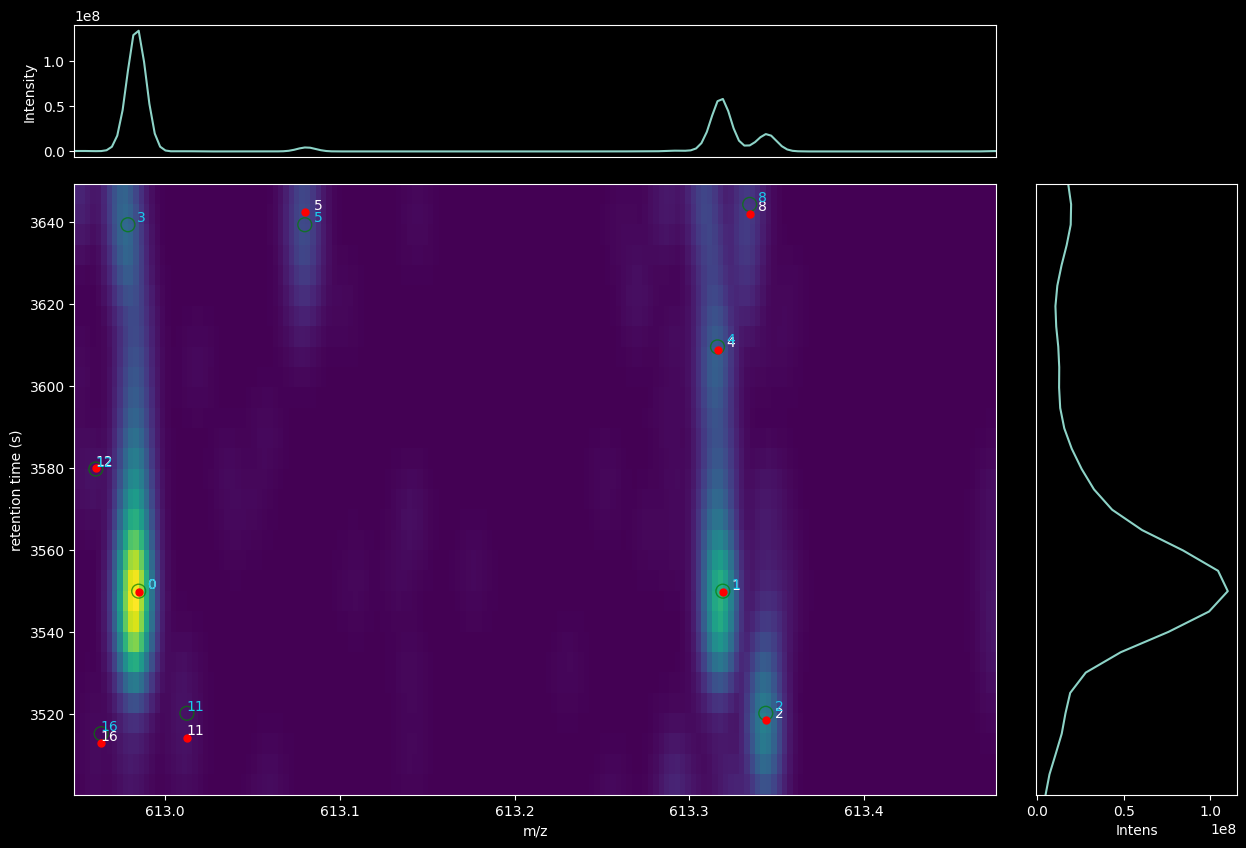

In [18]:
# print failed peak diagnostic information
for i, peak in enumerate(peaks1rc[0]):
    if peak.fit_failure_code != 0:
        print(f"Peak index: {i}\nError code: {print_64bit_as_bytes(peak.fit_failure_code)}")
        print(pq.get_fit_failure_errors(peak.fit_failure_code, pq.Peak.error_messages))

# Plot with and without failed peaks
plotWithFailedPeaks = plot_meshPeaks(mesh=grid1rc[0], peaks=peaks1rc[0], localMax=[], withFailedPeaks=True, showIndeces=True)
plotWithoutFailedPeaks = plot_meshPeaks(mesh=grid1rc[0], peaks=peaks1rc[0], localMax=[], withFailedPeaks=False, showIndeces=True)

Now visualization of the 2D smooth grid obtained from centroid data with interactive plotly plot.

In [19]:
# Interactive plotting using plotly the 2D smoothed grid and with all peaks
plotWithFailedPeaksInteractive = plot_meshPeaks_interactive(mesh=grid1rc[0], peaks=peaks1rc[0], localMax=localMax1rc[0], withFailedPeaks=True, showIndeces=True)
plotWithoutFailedPeaksInteractive = plot_meshPeaks_interactive(mesh=grid1rc[0], peaks=peaks1rc[0], localMax=localMax1rc[0], withFailedPeaks=False, showIndeces=True)

## Comparing peaks list obtained with centroid and profile mode.
Comparing peaks list obtained from profile and centroid mode of the same data.

In [20]:
smoothParam = [[5, 5, 0.8, 0.6], [10, 10, 0.8, 0.6]]
i= 0
# processing the whole file for centroid data
grid1c = pq.resample(lcmsData1c, smoothParam[i][0], smoothParam[i][1], smoothParam[i][2], smoothParam[i][3])
peaks1c = pq.find_peaks(lcmsData1c, grid1c, params['max_peaks'])
locMax1c = pq.find_local_maxima(grid1c)

# print the number of peaks
print("Number of peaks in profile data: ", len(peaks1))
print("Number of peaks in centroid data: ", len(peaks1c))

print("First peak in profile data: ", peaks1[0].fitted_mz, peaks1[0].fitted_rt)
print("First peak in centroid data: ", peaks1c[0].fitted_mz, peaks1c[0].fitted_rt)

print(lcmsData1.get_theoretical_sigma_mz(peaks1[0].fitted_mz))


Number of peaks in profile data:  3297
Number of peaks in centroid data:  2558
First peak in profile data:  598.9701556261268 3653.0050070730344
First peak in centroid data:  598.9697920695161 3652.9073846585775
0.006288354457118324
